<a href="https://colab.research.google.com/github/vklohiya/random-notebooks/blob/master/loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vehicle Loan Default Prediction
Decision Tree,  Logistic Regression

 ## 1. Business Understanding

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. Therefore, using Data Science, Exploratory Data Analysis and public data provided by financial institutions, we will be exploring and crunching out the driving factors that exists behind loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date, i.e. the variables which are strong indicators of default. Further, the institution can utilise this knowledge for its portfolio and risk assessment.

Following Information regarding the loan and loanee are provided:

1. Loanee Information (Demographic data like age, income, Identity proof etc.)
2. Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
3. Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.


Based on the above bussiness understanding it looks like a Binary Classification problem where we have to classify that a new loanee will default the first EMI or not.


Target variable: - LOAN_DEFAULT

Possible Target value: 

0 = Does not default the first EMI

1 = Loanee defaults the first EMI


Our project scope is to run the exploratory data analysis to find the business insights from our loan data, and to build a learning model using data mining techniques / machine leaning algorithms that will use the historic loan data to learn and helps to identify loans/borrowers which are likely to default the first EMI. We will be doing following things as part of this project

Data Understanding - We analyse the quality of data provided, we will be checking any missing or duplicate values presents in the data. We will check the target class is imbalanced or not. We will try to identify the features which have lot of zeros. We will do exploratory data analysis to find the business insights from the data. 

Data Preparation - We will use the data cleaning/imputation techniques for the missing values imputation. We may also need to remove some features which have missing values for more than 90% of the data. 

Feature Engineering - Our dataset may contains large features for every loan record, using all the features in the model might lead to the “Curse Of Dimensionality”. Therefore, we will use feature engineering and feature selection techniques to discover the features that are most indicative in default loan prediction.

Prediction Model - As part of this project, we will build a learning model using Decision Tree and Logistic regression techniques, which helps predicting new borrowers that would likely to default their loans.

## 2. Data Understanding

### Assert data quality

In [1]:
################### Importing Libraries ######################
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

test = pd.read_csv('./archive/test.csv')
train = pd.read_csv('./archive/train.csv')

# Info of dataframe

print("Inspecting training dataframe: ")
train.info()
print("Inspecting test dataframe: ")
test.info()


Inspecting training dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      225493 non-null  object 
 10  DISBURSAL_DATE                       233154 non-

#### Combining Train and Test

In [2]:
# Complete data set including test and train
df= pd.concat ([train, test])

In [3]:
# Sample data
pd.set_option('display.max_columns', None)
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1.0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1.0


In [4]:
#Check missing values
print("\nListing summary of misssing values as per column:")
#Null values in dataset
df.isnull().sum()


Listing summary of misssing values as per column:


UNIQUEID                                    0
DISBURSED_AMOUNT                            0
ASSET_COST                                  0
LTV                                         0
BRANCH_ID                                   0
SUPPLIER_ID                                 0
MANUFACTURER_ID                             0
CURRENT_PINCODE_ID                          0
DATE_OF_BIRTH                               0
EMPLOYMENT_TYPE                         11104
DISBURSAL_DATE                              0
STATE_ID                                    0
EMPLOYEE_CODE_ID                            0
MOBILENO_AVL_FLAG                           0
AADHAR_FLAG                                 0
PAN_FLAG                                    0
VOTERID_FLAG                                0
DRIVING_FLAG                                0
PASSPORT_FLAG                               0
PERFORM_CNS_SCORE                           0
PERFORM_CNS_SCORE_DESCRIPTION               0
PRI_NO_OF_ACCTS                   

### Descriptitive statistics

#### Univariate Statistics

In [5]:
# Box Plot for one feature
def plot_box(feature, color):
    plt.figure(figsize=(10,6))
    plt.title("Box Plot of %s" % feature)
    sns.boxplot(x=df[feature].dropna(),color=color)
    plt.show()

count    345546.000000
mean      54916.377391
std       13045.957158
min       11613.000000
25%       47645.000000
50%       54303.000000
75%       60947.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


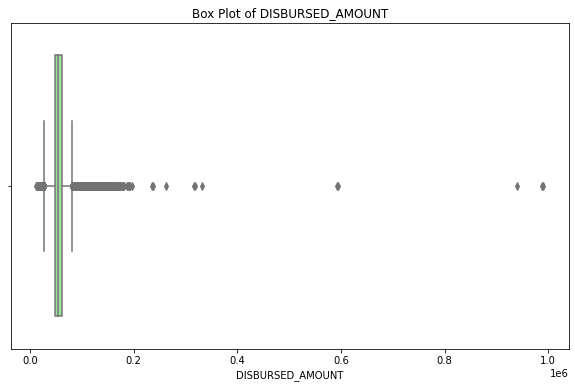

count    3.455460e+05
mean     7.629484e+04
std      1.873864e+04
min      3.700000e+04
25%      6.628200e+04
50%      7.154100e+04
75%      7.960500e+04
max      1.628992e+06
Name: ASSET_COST, dtype: float64


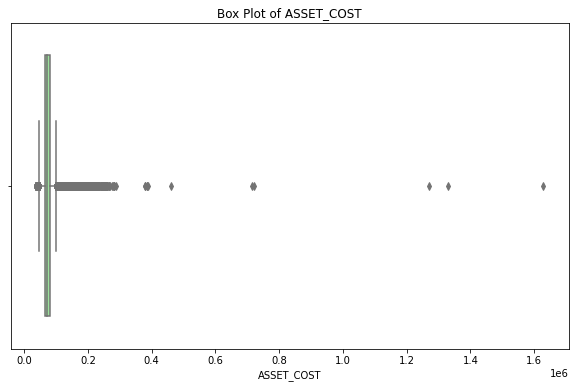

count    345546.00000
mean         74.92991
std          11.31522
min          10.03000
25%          69.28000
50%          77.14000
75%          83.69000
max          95.00000
Name: LTV, dtype: float64


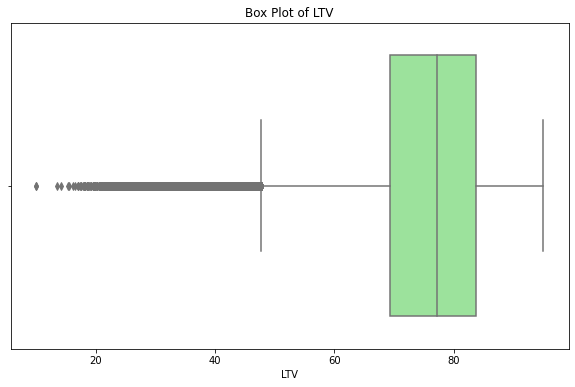

count    345546.000000
mean        289.032062
std         338.841228
min           0.000000
25%           0.000000
50%           0.000000
75%         679.000000
max         890.000000
Name: PERFORM_CNS_SCORE, dtype: float64


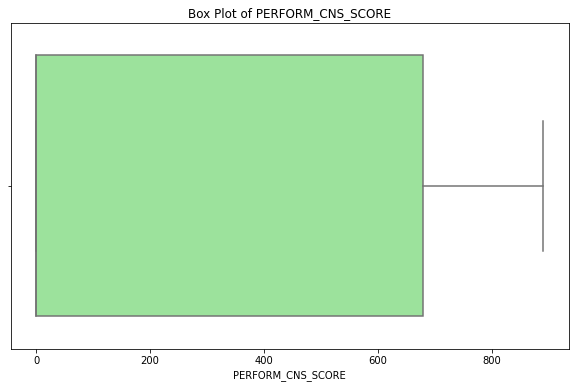

count    345546.000000
mean          2.371201
std           5.013630
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max         453.000000
Name: PRI_NO_OF_ACCTS, dtype: float64


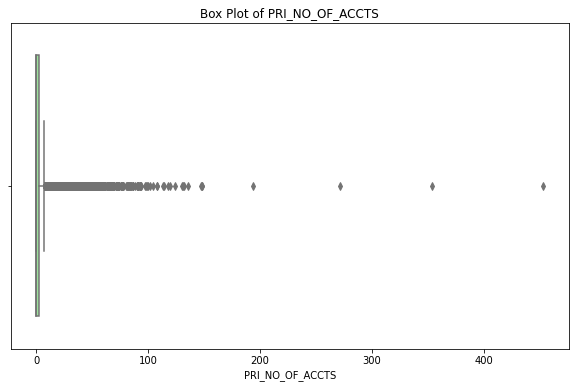

count    345546.000000
mean          1.003586
std           1.877087
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         144.000000
Name: PRI_ACTIVE_ACCTS, dtype: float64


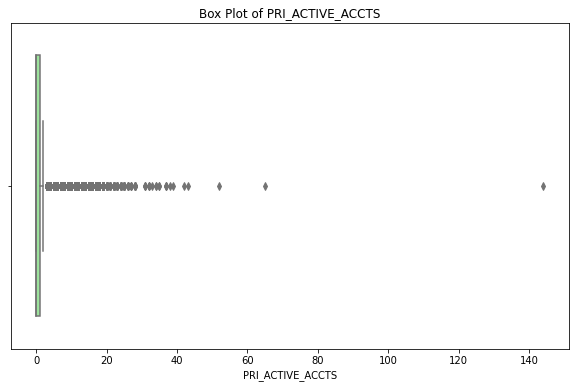

count    345546.000000
mean          0.155146
std           0.543333
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          25.000000
Name: PRI_OVERDUE_ACCTS, dtype: float64


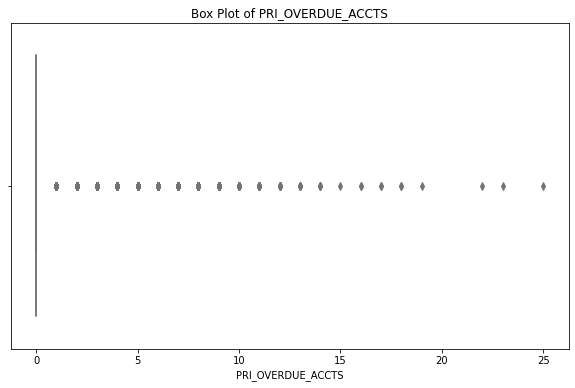

count    3.455460e+05
mean     1.602702e+05
std      9.253457e+05
min     -6.678296e+06
25%      0.000000e+00
50%      0.000000e+00
75%      3.136450e+04
max      9.652492e+07
Name: PRI_CURRENT_BALANCE, dtype: float64


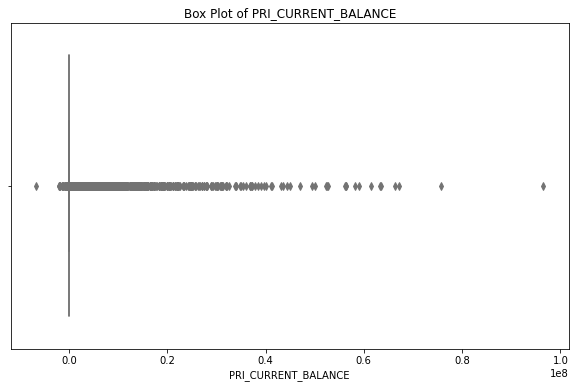

count    3.455460e+05
mean     2.096509e+05
std      2.043866e+06
min     -4.815000e+05
25%      0.000000e+00
50%      0.000000e+00
75%      5.941675e+04
max      1.000000e+09
Name: PRI_SANCTIONED_AMOUNT, dtype: float64


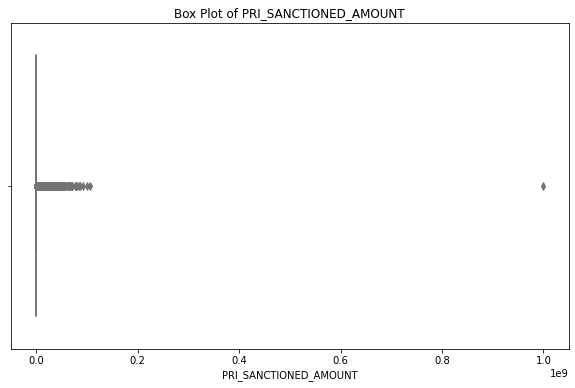

count    3.455460e+05
mean     2.095608e+05
std      2.047483e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.764575e+04
max      1.000000e+09
Name: PRI_DISBURSED_AMOUNT, dtype: float64


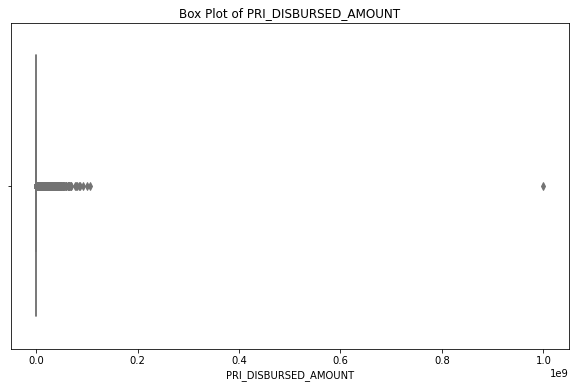

count    345546.000000
mean          0.047528
std           0.561836
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          57.000000
Name: SEC_NO_OF_ACCTS, dtype: float64


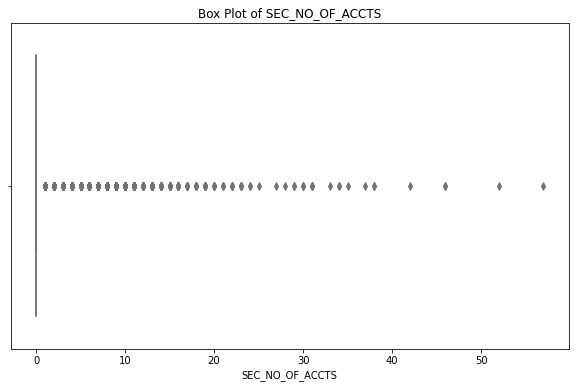

count    345546.000000
mean          0.022709
std           0.283288
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: SEC_ACTIVE_ACCTS, dtype: float64


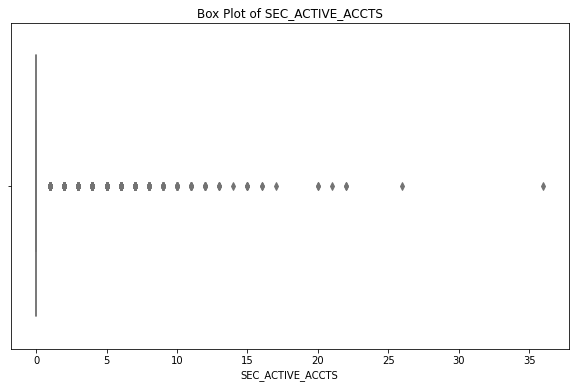

count    345546.000000
mean          0.005921
std           0.100497
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: SEC_OVERDUE_ACCTS, dtype: float64


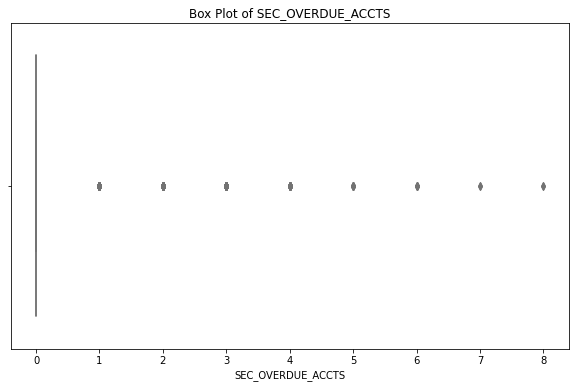

count    3.455460e+05
mean     4.565299e+03
std      1.612026e+05
min     -5.746470e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.603285e+07
Name: SEC_CURRENT_BALANCE, dtype: float64


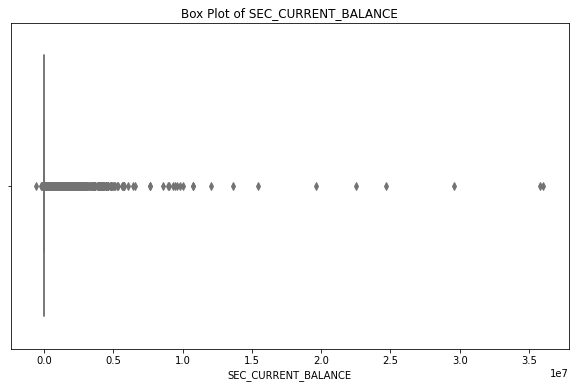

count    3.455460e+05
mean     6.133302e+03
std      1.893427e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.794500e+07
Name: SEC_SANCTIONED_AMOUNT, dtype: float64


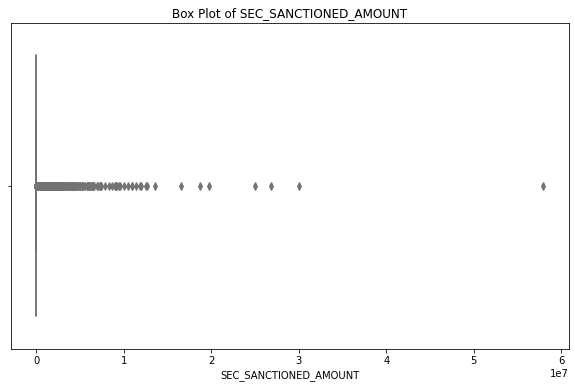

count    3.455460e+05
mean     6.038715e+03
std      1.889114e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.794500e+07
Name: SEC_DISBURSED_AMOUNT, dtype: float64


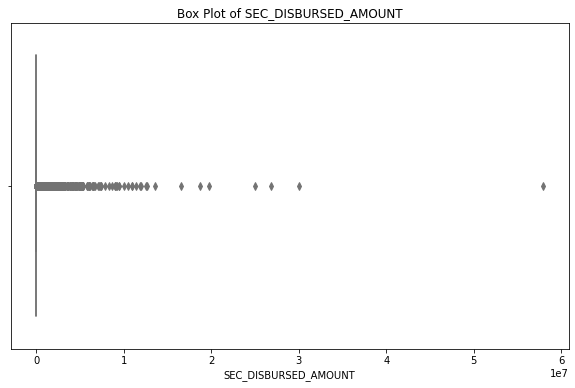

count    3.455460e+05
mean     1.249773e+04
std      1.997545e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.946000e+03
max      8.526233e+07
Name: PRIMARY_INSTAL_AMT, dtype: float64


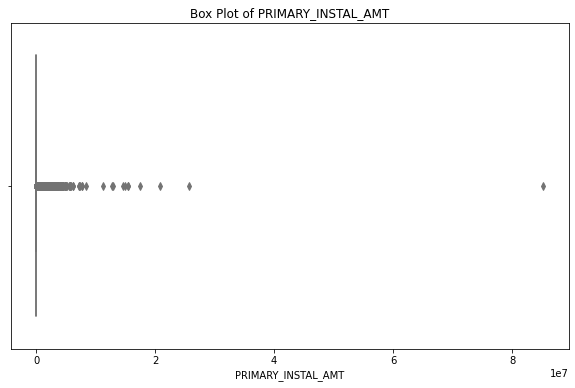

count    3.455460e+05
mean     2.727354e+02
std      1.626126e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.390000e+06
Name: SEC_INSTAL_AMT, dtype: float64


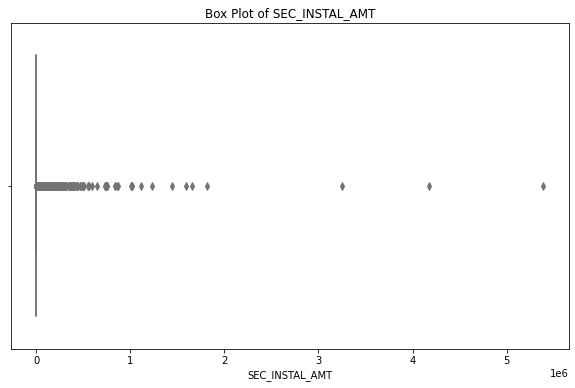

count    345546.000000
mean          0.360065
std           0.920797
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          35.000000
Name: NEW_ACCTS_IN_LAST_SIX_MONTHS, dtype: float64


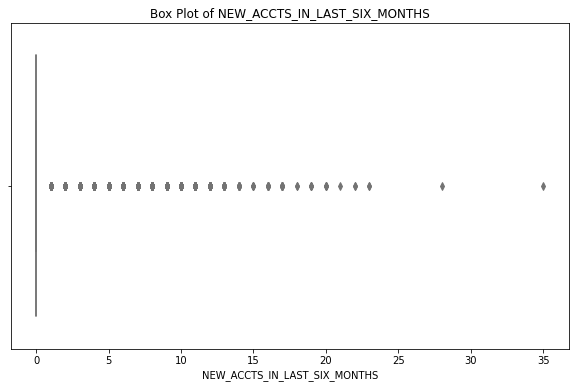

count    345546.000000
mean          0.095660
std           0.383594
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, dtype: float64


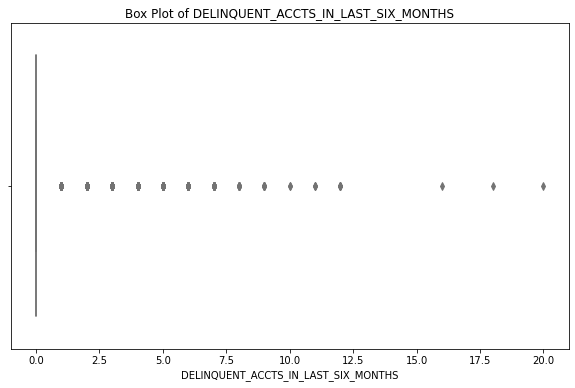

count    345546.000000
mean          0.212959
std           0.717365
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          36.000000
Name: NO_OF_INQUIRIES, dtype: float64


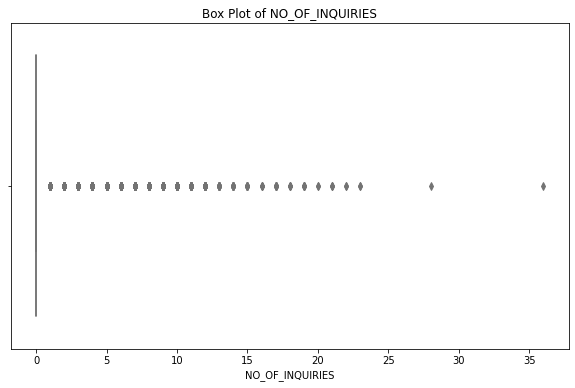

In [6]:
# Let's look at the statistics for numerical data
NUMERICAL_COL = ['DISBURSED_AMOUNT','ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE','PRI_NO_OF_ACCTS','PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS','PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 
              'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT','SEC_DISBURSED_AMOUNT', 
              'PRIMARY_INSTAL_AMT','SEC_INSTAL_AMT','NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 
              'NO_OF_INQUIRIES',]

for col in NUMERICAL_COL:
    print(df[col].describe())
    plot_box(col, "lightgreen")

#### Pairwise Correlations

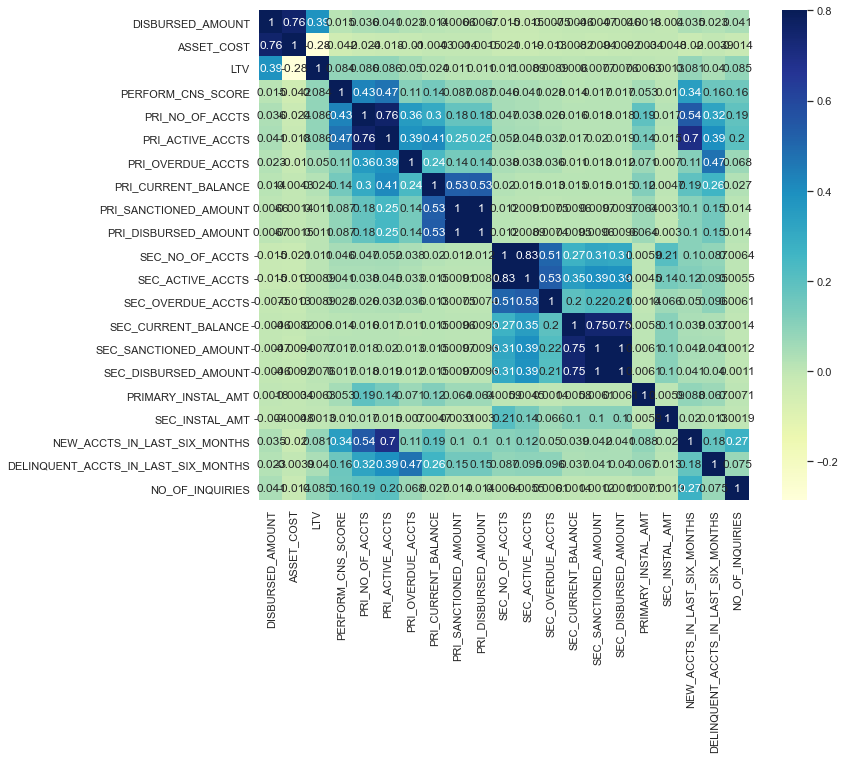

In [7]:

sns.set()

cols = df[NUMERICAL_COL]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

#### Histograms

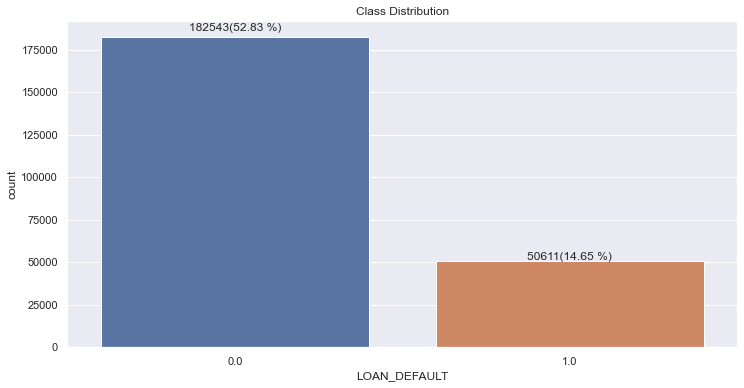

In [8]:
# Total count
total=len(df['LOAN_DEFAULT'])
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = df)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}({round(((height/total)*100),2)} %)', (x + width/2, y + height*1.02), ha='center')
plt.title('Class Distribution')
plt.show()


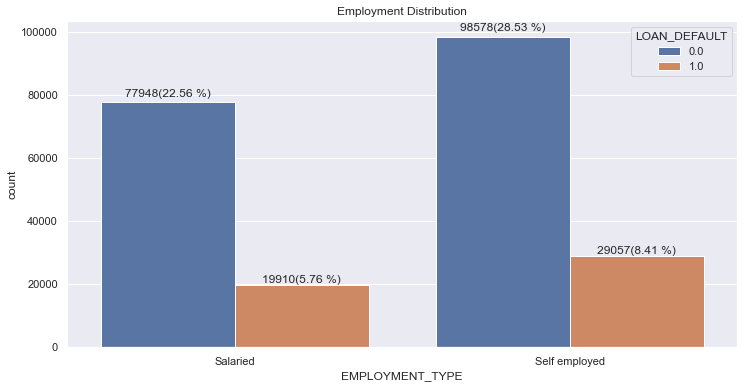

In [9]:
### Data Visualization libraries

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'EMPLOYMENT_TYPE', data = df, hue='LOAN_DEFAULT')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}({round(((height/total)*100),2)} %)', (x + width/2, y + height*1.02), ha='center')
plt.title('Employment Distribution')
plt.show()



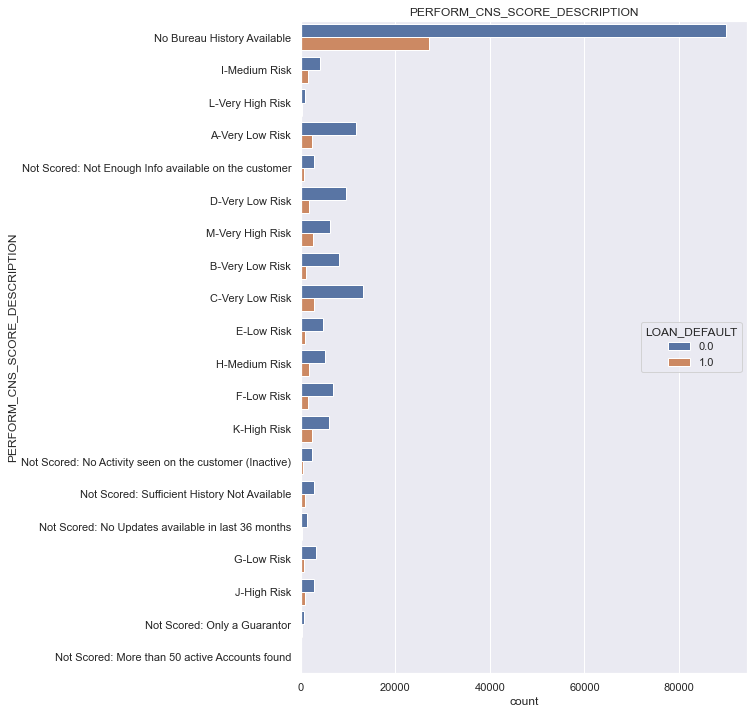

In [10]:
plt.figure(figsize = (8, 12))
ax = sns.countplot(y = 'PERFORM_CNS_SCORE_DESCRIPTION', data = df, hue='LOAN_DEFAULT')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    #ax.annotate(f'{height}({round(((height/total)*100),2)} %)', (x + width/2, y + height*1.02), ha='left')
plt.title('PERFORM_CNS_SCORE_DESCRIPTION')
plt.show()

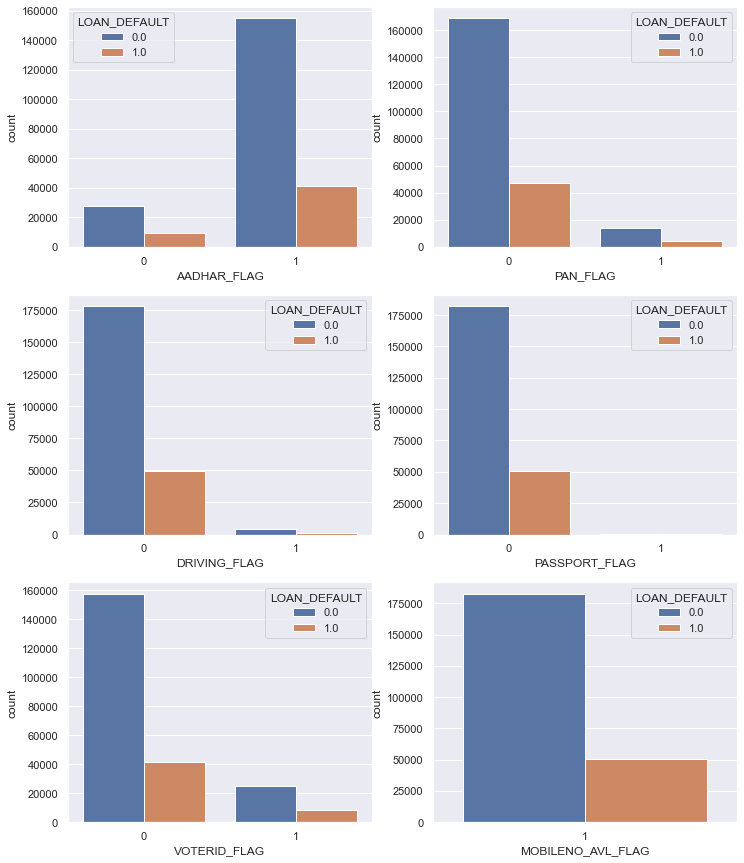

In [11]:
# Let's look into data with lesser importance
categorical_columns = ["AADHAR_FLAG","PAN_FLAG","DRIVING_FLAG","PASSPORT_FLAG", "VOTERID_FLAG","MOBILENO_AVL_FLAG"]
fig,axes = plt.subplots(3,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df,hue='LOAN_DEFAULT',ax=axes[row,col])


## Summary
1. We can see there are total 41 columns including target variable, all of them are self explanatory. 
2. We also see some missing values for EMPLOYMENT_TYPE.
3. AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH are object, but they should be int.
4. DATE_OF_BIRTH & DISBURSAL_DATE should be datetime type
5. Following fields should be of object type as they are binary type:
    AADHAR_FLAG, PAN_FLAG, DRIVING_FLAG, PASSPORT_FLAG, VOTERID_FLAG and MOBILENO_AVL_FLAG
6. Follwoing fields should be object type as they are nominal data:
    CURRENT_PINCODE_ID, EMPLOYEE_CODE_ID, STATE_ID, BRANCH_ID, MANUFACTURER_ID, and SUPPLIER_ID
7. The LOAN_DEFAULT variable, which captures loan defaults as 1's and loan non-defaults as 0's, is heavily imbalanced, with non-defaults outnumbering defaults 6.7:1 in this dataset. This class imbalance will be important later on when training our machine learning models.
8. There are outliers in the data
9. No of primary account is coreleated to no of primary active account
10. No of secondary account is coreleated to no of secondary active account
11. Asset cost is correlated to disbursed amount
12. Primary sanctioned amount is highly correlated with primary disbursed amount
13. Secondary sanctioned amount is highly correlated with secondary disbursed amount
14. New account in last six months is correlated with no of active accounts
15. Self employed people defaults 10% more loan than salaried class people.


## 3. Data Preparation

### Remove Duplicate Entries 

In [12]:
# Drop duplicates
df.drop_duplicates()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,STATE_ID,EMPLOYEE_CODE_ID,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRI_NO_OF_ACCTS,PRI_ACTIVE_ACCTS,PRI_OVERDUE_ACCTS,PRI_CURRENT_BALANCE,PRI_SANCTIONED_AMOUNT,PRI_DISBURSED_AMOUNT,SEC_NO_OF_ACCTS,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1.0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,755547,44875,72509,67.58,74,16646,86,2591,14-05-1992,Self employed,28-11-2018,4,3823,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
112388,716994,53549,72509,78.61,74,16646,86,2593,24-04-1984,Self employed,19-11-2018,4,3823,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,NaN
112389,709352,55243,72509,81.37,74,16646,86,2593,01-01-1986,Self employed,17-11-2018,4,3823,1,1,0,0,0,0,785,B-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4yrs 10mon,9yrs 5mon,0,NaN
112390,699795,55243,72509,81.37,74,16646,86,2593,01-01-1973,Self employed,15-11-2018,4,3823,1,1,0,0,0,0,714,D-Very Low Risk,1,1,0,36380,100000,100000,0,0,0,0,0,0,0,0,1,1,0yrs 3mon,0yrs 3mon,0,NaN


### Missing Values Imputation

In [13]:
############ Missing Values Treatment ######################
print("Unique value of EMPLYMENT_TYPE:")
print(df.EMPLOYMENT_TYPE .unique())

df.EMPLOYMENT_TYPE= df.EMPLOYMENT_TYPE.fillna("Missing")

print("Replacing 'nan' with 'Missing':")
print(df.EMPLOYMENT_TYPE .unique())


Unique value of EMPLYMENT_TYPE:
['Salaried' 'Self employed' nan]
Replacing 'nan' with 'Missing':
['Salaried' 'Self employed' 'Missing']


### Data Transformation

In [14]:
nominal_columns = ["CURRENT_PINCODE_ID", "EMPLOYEE_CODE_ID", "STATE_ID", "BRANCH_ID", "MANUFACTURER_ID", "SUPPLIER_ID"]
# Converting the AVERAGE_ACCT_AGE in months
df['acct_age_m']=df['AVERAGE_ACCT_AGE'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))

# Converting the CREDIT_HISTORY_LENGTH in months
df['credit_history_len']=df['CREDIT_HISTORY_LENGTH'].apply(lambda x: int(x.split(" ")[0][:-3])*12+int(x.split(" ")[1][:-3]))

# Changing DATE_OF_BIRTH & DISBURSAL_DATE to datetime type
#format='%d%b%Y:%H:%M:%S.%f'
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
df['DISBURSAL_DATE'] =  pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')


# Converting Nominal data into object type
for i in nominal_columns:
    df[i]=df[i].astype(np.object)
# Converting categorical data into object type
for i in categorical_columns:
    df[i]=df[i].astype(np.object)


## Feature Engineering

### Feature Construction

In [15]:
# Converting Date of birth to age and creating new feature age
def calculateage(v):
    '''Function to covert the given date of birth to age.'''
    return pd.to_datetime('today').year-pd.to_datetime(v).year


df['age']=df['DATE_OF_BIRTH'].apply(calculateage)


# Calculating asset value
df['asset_value']=df['DISBURSED_AMOUNT']*(df['LTV']/100)


# Calculating extra finance required to buy the asset
df['extra_finance']=df['ASSET_COST']*(df['LTV']/100)-df['DISBURSED_AMOUNT']



### Grouping Operations

In [16]:
# Total loans taken by the customer at the time of disbursement
df['total_loan_account']=df['PRI_NO_OF_ACCTS']+df['SEC_NO_OF_ACCTS']


# Total no of active loan accounts at the time of loan disbursment
df['total_active_loan_accounts']=df['PRI_ACTIVE_ACCTS']+df['SEC_ACTIVE_ACCTS']


# Total no of default accounts at the time of disbursement
df['total_overdue_account']=df['PRI_OVERDUE_ACCTS']+df['SEC_OVERDUE_ACCTS']


# Total principal outstanding amount  at the time of loan disbursment
df['total_remaining_loan_amount']=df['PRI_CURRENT_BALANCE']+df['SEC_CURRENT_BALANCE']


# Total amount that was sanctioned for all the loans at the time of disbursement
df['total_sectioned_amount']=df['PRI_SANCTIONED_AMOUNT']+df['SEC_SANCTIONED_AMOUNT']


# Total amount that was disbursed for all the loans at the time of disbursement
df['total_disbursed_amount']=df['PRI_DISBURSED_AMOUNT']+df['SEC_DISBURSED_AMOUNT']


# Total EMI Amount of all the loans
df['total_emi']=df['PRIMARY_INSTAL_AMT']+df['SEC_INSTAL_AMT']


### Binarization

In [17]:
# Creating new features from PERFORM_CNS_SCORE_DESCRIPTION 
df['Not_Scored']=np.where(df['PERFORM_CNS_SCORE_DESCRIPTION'].str.contains('Not Scored'),1,0)
df['Very_Low']=np.where(df['PERFORM_CNS_SCORE_DESCRIPTION'].str.contains('Very Low'),1,0)
df['Very_High']=np.where(df['PERFORM_CNS_SCORE_DESCRIPTION'].str.contains('Very High'),1,0)
df['No_History']=np.where(df['PERFORM_CNS_SCORE_DESCRIPTION'].str.contains('No Bureau'),1,0)


# Creating new features from EMPLOYMENT_TYPE 
df['e_type_salaried']=np.where(df['EMPLOYMENT_TYPE'].str.match('Salaried'),1,0)
df['e_type_self']=np.where(df['EMPLOYMENT_TYPE'].str.match('Self employed'),1,0)
df['e_type_miss']=np.where(df['EMPLOYMENT_TYPE'].str.match('Missing'),1,0)

## Feature Selection

In [18]:
# Dropping attribute from which new attributes are generated
old_att = ["PRI_NO_OF_ACCTS", "PRI_ACTIVE_ACCTS", "PRI_OVERDUE_ACCTS", "PRI_CURRENT_BALANCE", "PRI_SANCTIONED_AMOUNT", "PRI_DISBURSED_AMOUNT",
           "SEC_NO_OF_ACCTS", "SEC_ACTIVE_ACCTS", "SEC_OVERDUE_ACCTS", "SEC_CURRENT_BALANCE", "SEC_SANCTIONED_AMOUNT", "SEC_DISBURSED_AMOUNT", 
           "PERFORM_CNS_SCORE_DESCRIPTION", "PRIMARY_INSTAL_AMT", "SEC_INSTAL_AMT", "EMPLOYMENT_TYPE"]
print(f"\nDropping the attributes NUMERICAL attributes as the new feature are generated from these: {NUMERICAL_COL}")
df= df.drop(columns= old_att)


Dropping the attributes NUMERICAL attributes as the new feature are generated from these: ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES']


In [19]:
# Droping the data with less significance
print(f"\nDropping the columns as they are least significant: {categorical_columns}")
df= df.drop(columns= categorical_columns)

print(f"\nDropping the nominal data: {nominal_columns}")
df= df.drop(columns= nominal_columns)
df= df.drop(columns= ["UNIQUEID"])



Dropping the columns as they are least significant: ['AADHAR_FLAG', 'PAN_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'VOTERID_FLAG', 'MOBILENO_AVL_FLAG']

Dropping the nominal data: ['CURRENT_PINCODE_ID', 'EMPLOYEE_CODE_ID', 'STATE_ID', 'BRANCH_ID', 'MANUFACTURER_ID', 'SUPPLIER_ID']


In [20]:
# Droping date type attribute as not time series data
print(f"\nDropping the date attribute: DATE_OF_BIRTH, DISBURSAL_DATE")
df= df.drop(columns= ["DATE_OF_BIRTH", "DISBURSAL_DATE"])


Dropping the date attribute: DATE_OF_BIRTH, DISBURSAL_DATE


In [21]:
# Droping the duplicate attributes
print(f"\nDropping the date attribute: AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH")
df= df.drop(columns= ["CREDIT_HISTORY_LENGTH", "AVERAGE_ACCT_AGE"])


Dropping the date attribute: AVERAGE_ACCT_AGE, CREDIT_HISTORY_LENGTH


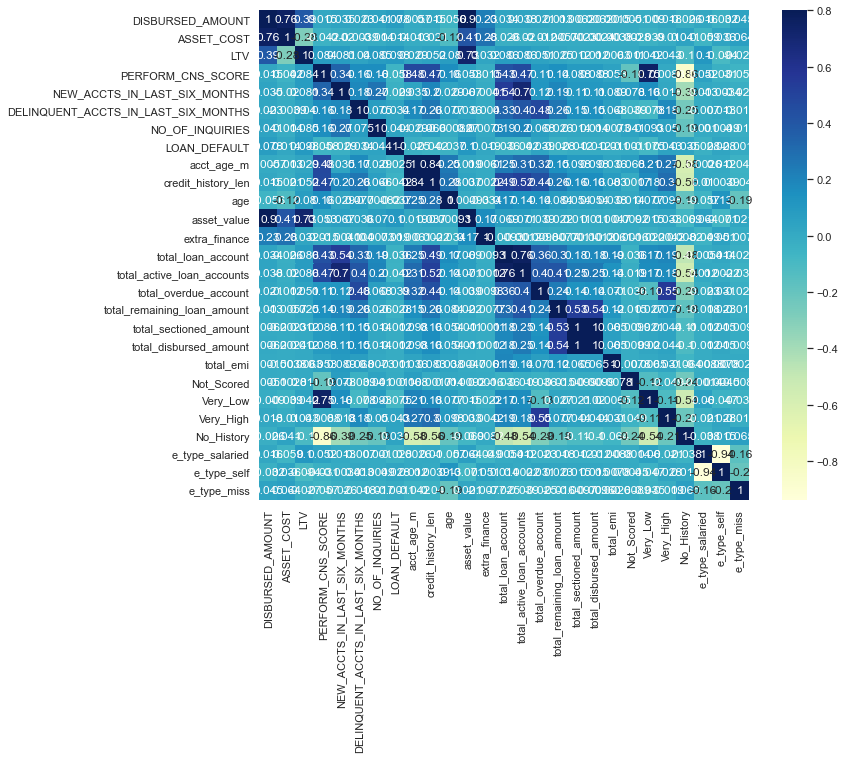

In [22]:
sns.set()

cols = df[df.columns]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

In [23]:

# Dropping highly correlated data after feature engineering
print(f"\nDropping the highly correlated data: acct_age_m, NEW_ACCTS_IN_LAST_SIX_MONTHS", "DISBURSED_AMOUNT", "LTV")
df= df.drop(columns= ["total_loan_account", "total_sectioned_amount", "acct_age_m", "NEW_ACCTS_IN_LAST_SIX_MONTHS", "DISBURSED_AMOUNT", "LTV"])


Dropping the highly correlated data: acct_age_m, NEW_ACCTS_IN_LAST_SIX_MONTHS DISBURSED_AMOUNT LTV


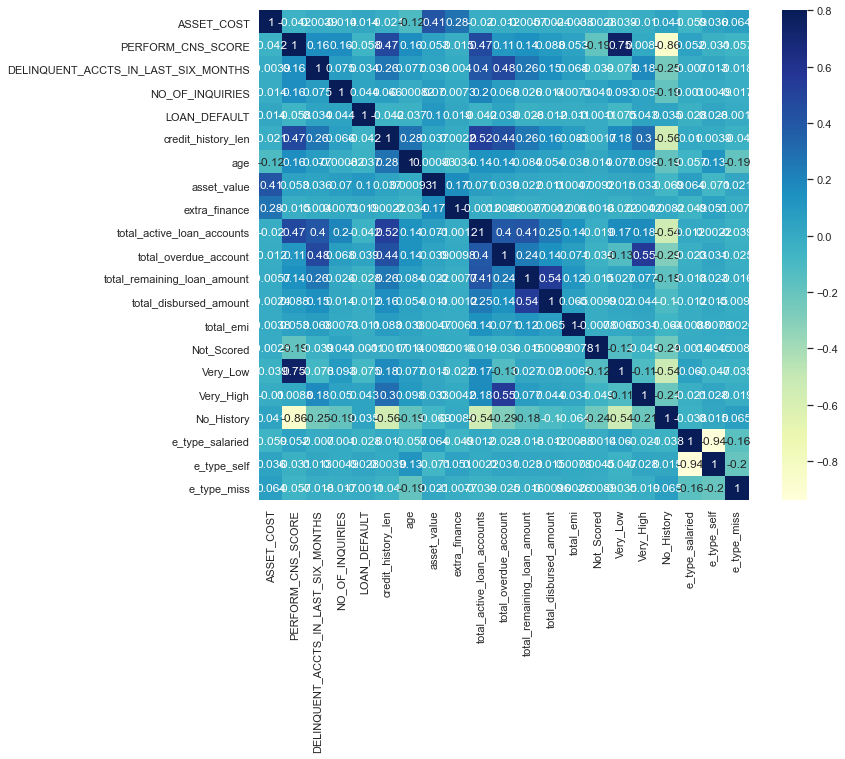

In [24]:
sns.set()

cols = df[df.columns]
corr = cols.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

### Outliers Treatment

In [25]:
# finding and removing outliers:

def outlierTreatment(df, feature):
    # Number of observations in column
    print(f"No. of observations in column {feature}: {len(df[feature])}")

    # calculate summary statistics
    data_mean, data_std = mean(df[feature]), std(df[feature])
    print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in df[feature] if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    
    def impute_outlier(x):
        # Replacing outlier values with mean value
        if x <= lower:
            return(data_mean)
        elif x>= (upper):
            return(data_mean)
        else:
            return(x)
    new_feature = feature.lower()+"_new"
    df[new_feature]= df[feature].apply(impute_outlier)
    print(f"No. of observations in new column {new_feature}: {len(df[new_feature])}")
    print("\n")

In [26]:
continous_col = ["ASSET_COST", "PERFORM_CNS_SCORE", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                             "NO_OF_INQUIRIES", "credit_history_len", "age", "total_active_loan_accounts",
                             "total_overdue_account", "total_remaining_loan_amount", "total_disbursed_amount",
                              "total_emi", "asset_value", "extra_finance"]
bin_df = df.copy(deep=True)
for col in continous_col:
    outlierTreatment(bin_df, col) 

No. of observations in column ASSET_COST: 345546
Statistics: Mean=76294.839, Std dev=18738.615
Identified outliers: 6587
No. of observations in new column asset_cost_new: 345546


No. of observations in column PERFORM_CNS_SCORE: 345546
Statistics: Mean=289.032, Std dev=338.841
Identified outliers: 0
No. of observations in new column perform_cns_score_new: 345546


No. of observations in column DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS: 345546
Statistics: Mean=0.096, Std dev=0.384
Identified outliers: 4718
No. of observations in new column delinquent_accts_in_last_six_months_new: 345546


No. of observations in column NO_OF_INQUIRIES: 345546
Statistics: Mean=0.213, Std dev=0.717
Identified outliers: 5381
No. of observations in new column no_of_inquiries_new: 345546


No. of observations in column credit_history_len: 345546
Statistics: Mean=16.006, Std dev=28.224
Identified outliers: 8829
No. of observations in new column credit_history_len_new: 345546


No. of observations in column age: 3455

In [27]:
# Droping the old attributes
bin_df= bin_df.drop(columns= continous_col)

### Binning

In [28]:
# Creating bins for PERFORM_CNS_SCORE attribute
bin_df['perform_cnc_score_bins']=pd.cut(bin_df['perform_cns_score_new'],5,labels=['Slim','Doubtful','Fair','Good','Great']).astype(np.object)


# Creating bins for asset_value attribute
bin_df['asset_value_bins']=pd.cut(bin_df['asset_value_new'],3,labels=['Low','Medium','High']).astype(np.object)

# Creating bins for ASSET_COST
bin_labels = ['Low', 'Medium', 'High', 'Extreme']
bin_df['asset_cost_bins'] = pd.qcut(bin_df['asset_cost_new'],
                              q=[0, .25, .5, .75, 1],
                              labels=bin_labels)
bin_df['asset_cost_bins'].value_counts()

# Creating bins for age
bin_df['age_bins']=pd.cut(bin_df['age_new'],3,labels=['Youth','Middle-age','Senior']).astype(np.object)
# Creating bins for credit_history_len
bin_df['credit_history_len_bins']=pd.cut(bin_df['credit_history_len_new'],3,labels=['Low','Medium','High']).astype(np.object)

#### Binarization for bins

In [29]:
from sklearn.preprocessing import LabelBinarizer
columns = ["perform_cnc_score_bins","asset_value_bins","asset_cost_bins", "age_bins", "credit_history_len_bins"]
for col in columns:
    l = LabelBinarizer()
    train_col_xformed = pd.DataFrame(l.fit_transform(bin_df[col]))
    xformed_col_names = [col + '_' + str(i) for i in range(len(train_col_xformed.columns))]
    train_col_xformed.columns = xformed_col_names
    bin_df[xformed_col_names] = train_col_xformed
# Droping the actual column
bin_df = bin_df.drop(columns, axis=1)

### Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler() 
def scaleColumns(df, cols_to_scale):

    for col in cols_to_scale:

        df[col] = pd.DataFrame(scaler_data.fit_transform(pd.DataFrame(df[col])),columns=[col])

    return df
_df = scaleColumns(df, ["ASSET_COST", "PERFORM_CNS_SCORE", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS",
                             "NO_OF_INQUIRIES", "credit_history_len", "age", "total_active_loan_accounts",
                             "total_overdue_account", "total_remaining_loan_amount", "total_disbursed_amount",
                              "total_emi", "asset_value", "extra_finance"])
scale_df=_df[_df['LOAN_DEFAULT'].isnull()!=True]

### Feature subset selection

In [31]:
# importing various libraries for accuracy and train_test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [32]:
def predict_accuracy_by_feature_elimination(data, features_to_be_removed, model, show_visual=False, roc=False):
    
    #Prepare the dataset by removing the features mentioned
    for feature in features_to_be_removed:
        data = data.drop(feature, axis=1)
        
    if model == "Decision Tree":
        #Call Decision tree function to get the accuracy results
        prepare_decision_tree(data, show_visual = show_visual, roc=roc)  
    elif model == "Logisitic Regression":
        #Call logistic regression model to get the accuracy results
        prepare_logistic_model(data, show_visual = show_visual, roc=roc) 
    else:
        print("Invalid model specified")

In [33]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Decision Tree Classifier for Feature Subset Selection


##### Split Dataset

In [34]:
bin_train=bin_df[bin_df['LOAN_DEFAULT'].isnull()!=True]
bin_test=bin_df[bin_df['LOAN_DEFAULT'].isnull()==True]
bin_train.head()

,LOAN_DEFAULT,Not_Scored,Very_Low,Very_High,No_History,e_type_salaried,e_type_self,e_type_miss,asset_cost_new,perform_cns_score_new,delinquent_accts_in_last_six_months_new,no_of_inquiries_new,credit_history_len_new,age_new,total_active_loan_accounts_new,total_overdue_account_new,total_remaining_loan_amount_new,total_disbursed_amount_new,total_emi_new,asset_value_new,extra_finance_new,perform_cnc_score_bins_0,perform_cnc_score_bins_1,perform_cnc_score_bins_2,perform_cnc_score_bins_3,perform_cnc_score_bins_4,asset_value_bins_0,asset_value_bins_1,asset_value_bins_2,asset_cost_bins_0,asset_cost_bins_1,asset_cost_bins_2,asset_cost_bins_3,age_bins_0,age_bins_1,age_bins_2,credit_history_len_bins_0,credit_history_len_bins_1,credit_history_len_bins_2
0,0.0,0,0,0,1,1,0,0,58400.0,0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,45292.5990,1719.2000,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,1.0,0,0,0,0,0,1,0,65550.0,598,1.0,0.0,23.0,36.0,1.0,1.0,27600.0,50200.0,1991.0,34524.2835,857.2650,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,0.0,0,0,0,1,0,1,0,61360.0,0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,47753.0714,1718.9680,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
3,1.0,0,0,1,0,0,1,0,66113.0,305,0.0,1.0,15.0,28.0,0.0,0.0,0.0,0.0,31.0,50887.5024,983.7824,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
4,1.0,0,0,0,1,0,1,0,60300.0,0,0.0,1.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,46296.9142,921.1700,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0


In [35]:
from sklearn.tree import DecisionTreeClassifier
def prepare_decision_tree(data, show_visual = False, roc=False):
    X,y=data.drop('LOAN_DEFAULT',axis=1),data['LOAN_DEFAULT']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1994)
    dtree = DecisionTreeClassifier(max_depth = 10, random_state= 101, max_features =None , min_samples_leaf = 30).fit(X_train, y_train)

    # predict on test set
    dtree_pred = dtree.predict(X_test)
    print(f"Confusion Matrix: {confusion_matrix(y_test, dtree_pred)}")
    LOGCV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    print(f"Accuracy of model {accuracy_score(y_test, dtree_pred)}")
    print(f"Cross Validation Score {LOGCV}")
    print(f"Balanced Accuracy Score {balanced_accuracy_score(y_test, dtree_pred)}")
    print("F1 Score ",f1_score(y_test, dtree_pred))
    print("Recall Score ",recall_score(y_test, dtree_pred))
    if show_visual: 
        #Show the important features visually
        importances=pd.Series(dtree.feature_importances_, index=X.columns).sort_values()
        importances.plot(kind='barh', figsize=(12,8))
    if roc: 
        probs = dtree.predict_proba(X_test)
        #Keep Probabilities of the positive class only.
        probs = probs[:, 1]
        auc = roc_auc_score(y_test, probs)
        print('AUC: %.2f' % auc)
        fpr, tpr, thresholds = roc_curve(y_test, probs, pos_label=1.0)
        plot_roc_curve(fpr, tpr)

Confusion Matrix: [[54381   339]
 [15019   208]]
Accuracy of model 0.7804337569874333
Cross Validation Score 0.7799787891306881
Balanced Accuracy Score 0.5037323853548463
F1 Score  0.026372511728160263
Recall Score  0.013659946148289224


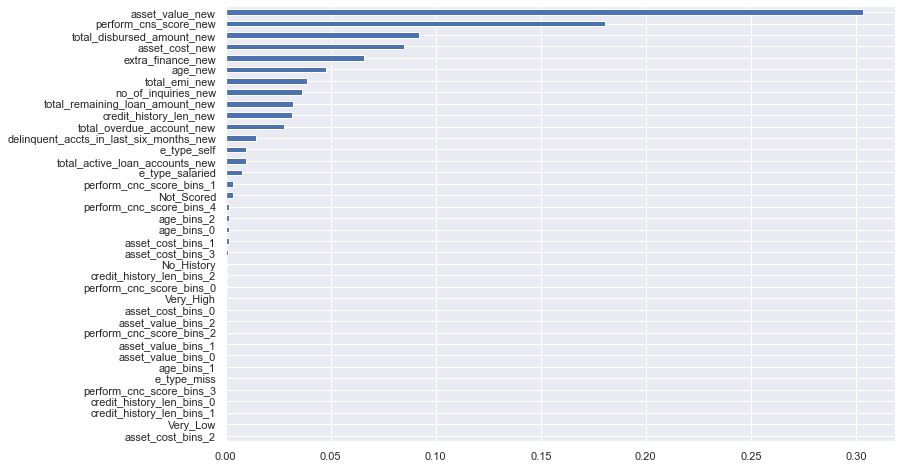

In [36]:
features_to_be_removed = []
predict_accuracy_by_feature_elimination(bin_train, features_to_be_removed, model="Decision Tree", show_visual=True)

Confusion Matrix: [[54401   319]
 [15031   196]]
Accuracy of model 0.780548129297897
Cross Validation Score 0.7799910429063482
Balanced Accuracy Score 0.5035210969847344
F1 Score  0.024901537288781604
Recall Score  0.012871872332041769


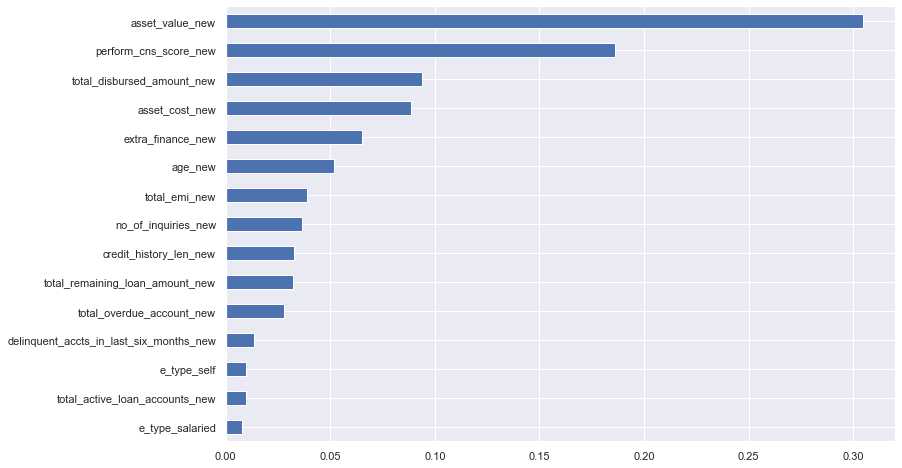

In [37]:
features_to_be_removed = ["e_type_miss","No_History", "Very_Low", "Not_Scored", "Very_High","asset_cost_bins_2","asset_cost_bins_0","asset_cost_bins_1", "asset_cost_bins_3", "credit_history_len_bins_0", "credit_history_len_bins_1", "credit_history_len_bins_2", "perform_cnc_score_bins_0", "perform_cnc_score_bins_1","perform_cnc_score_bins_2", "perform_cnc_score_bins_3", "perform_cnc_score_bins_4", "age_bins_0", "age_bins_1", "age_bins_2","asset_value_bins_0","asset_value_bins_1", "asset_value_bins_2" ]
predict_accuracy_by_feature_elimination(bin_train, features_to_be_removed, model="Decision Tree", show_visual=True)

Confusion Matrix: [[54405   315]
 [15021   206]]
Accuracy of model 0.7807482808412084
Cross Validation Score 0.7803709290989234
Balanced Accuracy Score 0.5038860107824398
F1 Score  0.02616205232410465
Recall Score  0.01352860051224798


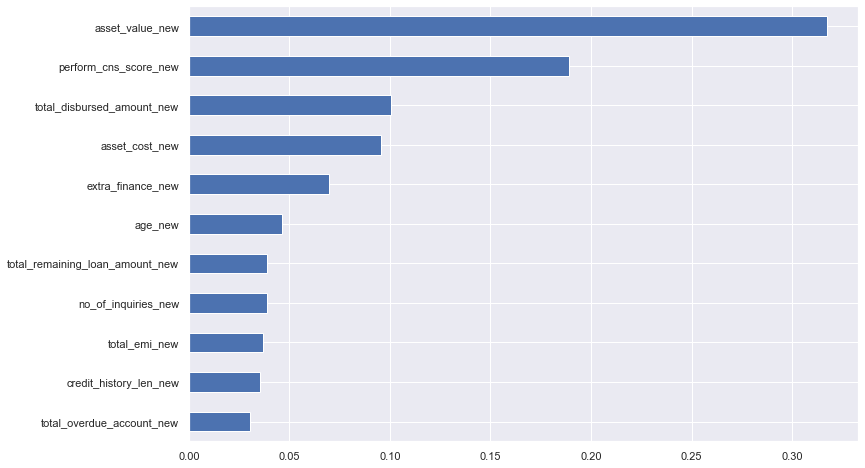

In [38]:
features_to_be_removed = ["delinquent_accts_in_last_six_months_new", "e_type_salaried", "e_type_self", "total_active_loan_accounts_new", "e_type_miss","No_History", "Very_Low", "Not_Scored", "Very_High","asset_cost_bins_2","asset_cost_bins_0","asset_cost_bins_1", "asset_cost_bins_3", "credit_history_len_bins_0", "credit_history_len_bins_1", "credit_history_len_bins_2", "perform_cnc_score_bins_0", "perform_cnc_score_bins_1","perform_cnc_score_bins_2", "perform_cnc_score_bins_3", "perform_cnc_score_bins_4", "age_bins_0", "age_bins_1", "age_bins_2","asset_value_bins_0","asset_value_bins_1", "asset_value_bins_2" ]
predict_accuracy_by_feature_elimination(bin_train, features_to_be_removed, model="Decision Tree", show_visual=True)

#### Logistic Regression for Feature Subset Selection

##### Split Dataset

In [39]:
scale_train=scale_df[scale_df['LOAN_DEFAULT'].isnull()!=True]
scale_test=scale_df[scale_df['LOAN_DEFAULT'].isnull()==True]
scale_train.head()

,ASSET_COST,PERFORM_CNS_SCORE,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,LOAN_DEFAULT,credit_history_len,age,asset_value,extra_finance,total_active_loan_accounts,total_overdue_account,total_remaining_loan_amount,total_disbursed_amount,total_emi,Not_Scored,Very_Low,Very_High,No_History,e_type_salaried,e_type_self,e_type_miss
0,-0.954971,-0.853003,-0.249379,-0.296863,0.0,-0.567111,-0.017242,0.286436,0.086224,-0.537043,-0.289660,-0.175037,-0.104762,-0.063690,0,0,0,1,1,0,0
1,-0.573406,0.911838,2.357549,-0.296863,1.0,0.247806,-0.118930,-0.577175,-0.948223,-0.013760,1.508725,-0.145729,-0.080370,-0.053760,0,0,0,0,0,1,0
2,-0.797009,-0.853003,-0.249379,-0.296863,0.0,-0.567111,-0.118930,0.483765,0.085945,-0.537043,-0.289660,-0.175037,-0.104762,-0.063690,0,0,0,1,0,1,0
3,-0.543361,0.047125,-0.249379,1.097129,1.0,-0.035644,-0.932432,0.735144,-0.796384,-0.537043,-0.289660,-0.175037,-0.104762,-0.063535,0,0,1,0,0,1,0
4,-0.853576,-0.853003,-0.249379,1.097129,1.0,-0.567111,0.694572,0.366982,-0.871528,-0.537043,-0.289660,-0.175037,-0.104762,-0.063690,0,0,0,1,0,1,0


In [40]:
from sklearn.linear_model import LogisticRegression
def prepare_logistic_model(data, show_visual = False, roc= False):
    X,y=data.drop('LOAN_DEFAULT',axis=1),data['LOAN_DEFAULT']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1994)
    logmodel = LogisticRegression(max_iter=150) 
    logmodel.fit(X_train,y_train)
    
    # predict on test set
    logpred = logmodel.predict(X_test)
    print(f"Confusion Matrix {confusion_matrix(y_test, logpred)}")
    LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    print(f"Accuracy of model {accuracy_score(y_test, logpred)}")
    print(f"Cross Validation Score {LOGCV}")
    print(f"Balanced Accuracy Score {balanced_accuracy_score(y_test, logpred)}")
    print("F1 Score ",f1_score(y_test, logpred))
    print("Recall Score ",recall_score(y_test, logpred))
    
    if show_visual:
        #Show the important features visually
        importance = logmodel.coef_[0]
        # plot feature importance
        pyplot.bar([x for x in range(len(importance))], importance)
        pyplot.show()
        # summarize feature importance
        for i,v in zip(X_train.columns, importance):
         print(f"\n\nFeature: {i}, Score: {round(v, 2)}")
    
    if roc: 
        probs = logmodel.predict_proba(X_test)
        #Keep Probabilities of the positive class only.
        probs = probs[:, 1]
        auc = roc_auc_score(y_test, probs)
        print('AUC: %.2f' % auc)
        fpr, tpr, thresholds = roc_curve(y_test, probs)
        plot_roc_curve(fpr, tpr)

Confusion Matrix [[54630    90]
 [15171    56]]
Accuracy of model 0.7818205212518049
Cross Validation Score 0.7827850404146708
Balanced Accuracy Score 0.5010164704835247
F1 Score  0.007285500552917453
Recall Score  0.0036776778091547908


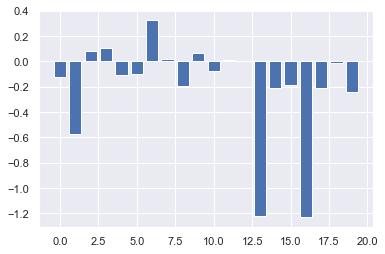



Feature: ASSET_COST, Score: -0.12


Feature: PERFORM_CNS_SCORE, Score: -0.58


Feature: DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS, Score: 0.08


Feature: NO_OF_INQUIRIES, Score: 0.1


Feature: credit_history_len, Score: -0.11


Feature: age, Score: -0.1


Feature: asset_value, Score: 0.33


Feature: extra_finance, Score: 0.01


Feature: total_active_loan_accounts, Score: -0.19


Feature: total_overdue_account, Score: 0.06


Feature: total_remaining_loan_amount, Score: -0.08


Feature: total_disbursed_amount, Score: 0.01


Feature: total_emi, Score: -0.0


Feature: Not_Scored, Score: -1.22


Feature: Very_Low, Score: -0.21


Feature: Very_High, Score: -0.19


Feature: No_History, Score: -1.23


Feature: e_type_salaried, Score: -0.21


Feature: e_type_self, Score: -0.01


Feature: e_type_miss, Score: -0.24


In [41]:
features_to_be_removed = []
predict_accuracy_by_feature_elimination(scale_train, features_to_be_removed, model="Logisitic Regression", show_visual=True)

Recall this is a classification problem with classes 0 and 1. Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

Let's try, to remove few features from data and see if it increases the accuracy.

Confusion Matrix [[54638    82]
 [15189    38]]
Accuracy of model 0.7816775558637253
Cross Validation Score 0.7825644683230195
Balanced Accuracy Score 0.5004985145365439
F1 Score  0.0049521079038248525
Recall Score  0.0024955670847836083


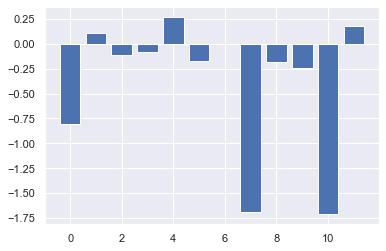



Feature: PERFORM_CNS_SCORE, Score: -0.8


Feature: NO_OF_INQUIRIES, Score: 0.11


Feature: credit_history_len, Score: -0.11


Feature: age, Score: -0.08


Feature: asset_value, Score: 0.27


Feature: total_active_loan_accounts, Score: -0.17


Feature: total_disbursed_amount, Score: 0.0


Feature: Not_Scored, Score: -1.69


Feature: Very_Low, Score: -0.18


Feature: Very_High, Score: -0.24


Feature: No_History, Score: -1.72


Feature: e_type_self, Score: 0.18


In [42]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(scale_train, features_to_be_removed, model="Logisitic Regression", show_visual=True)

## 4. Classification Models

## Classification Models with Binning

### Model 1: Decision Tree Classifier

Confusion Matrix: [[54405   315]
 [15021   206]]
Accuracy of model 0.7807482808412084
Cross Validation Score 0.7803709290989234
Balanced Accuracy Score 0.5038860107824398
F1 Score  0.02616205232410465
Recall Score  0.01352860051224798
AUC: 0.60


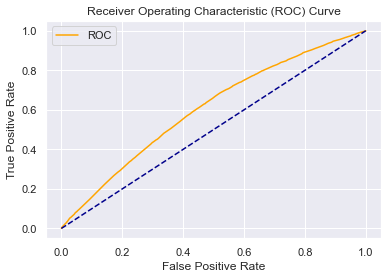

In [43]:
features_to_be_removed = ["delinquent_accts_in_last_six_months_new", "e_type_salaried", "e_type_self", "total_active_loan_accounts_new", "e_type_miss","No_History", "Very_Low", "Not_Scored", "Very_High","asset_cost_bins_2","asset_cost_bins_0","asset_cost_bins_1", "asset_cost_bins_3", "credit_history_len_bins_0", "credit_history_len_bins_1", "credit_history_len_bins_2", "perform_cnc_score_bins_0", "perform_cnc_score_bins_1","perform_cnc_score_bins_2", "perform_cnc_score_bins_3", "perform_cnc_score_bins_4", "age_bins_0", "age_bins_1", "age_bins_2","asset_value_bins_0","asset_value_bins_1", "asset_value_bins_2" ]
predict_accuracy_by_feature_elimination(bin_train, features_to_be_removed, model="Decision Tree", show_visual=False, roc=True)

Accuracy score is good, however the model is not predicting the Defaults well. Also lot of binned attributes are not contributing to the prediction.

### Model 2: Logistic Regression

Confusion Matrix [[54720     0]
 [15227     0]]
Accuracy of model 0.7823066035712753
Cross Validation Score 0.7831955627358473
Balanced Accuracy Score 0.5
F1 Score  0.0
Recall Score  0.0
AUC: 0.56


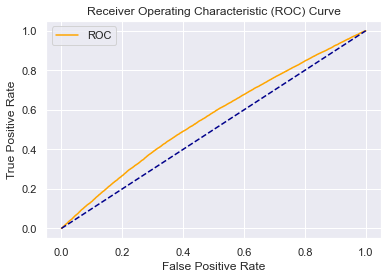

In [44]:
features_to_be_removed = ["delinquent_accts_in_last_six_months_new", "e_type_salaried", "e_type_self", "total_active_loan_accounts_new", "e_type_miss","No_History", "Very_Low", "Not_Scored", "Very_High","asset_cost_bins_2","asset_cost_bins_0","asset_cost_bins_1", "asset_cost_bins_3", "credit_history_len_bins_0", "credit_history_len_bins_1", "credit_history_len_bins_2", "perform_cnc_score_bins_0", "perform_cnc_score_bins_1","perform_cnc_score_bins_2", "perform_cnc_score_bins_3", "perform_cnc_score_bins_4", "age_bins_0", "age_bins_1", "age_bins_2","asset_value_bins_0","asset_value_bins_1", "asset_value_bins_2" ]
predict_accuracy_by_feature_elimination(bin_train, features_to_be_removed, model="Logisitic Regression", show_visual=False, roc=True)

## Classification Models with Scaling

### Model 1: Decision Tree Classifier

Confusion Matrix: [[54478   242]
 [15079   148]]
Accuracy of model 0.7809627289233276
Cross Validation Score 0.7811000694852416
Balanced Accuracy Score 0.5026485312235844
F1 Score  0.018953704296599858
Recall Score  0.009719577067051947
AUC: 0.60


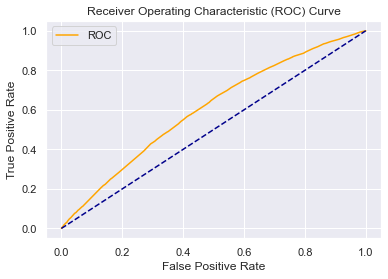

In [45]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(scale_train, features_to_be_removed, model="Decision Tree", show_visual=False, roc=True)

Accuracy score is good, however the model is not predicting the Defaults well

### Model 2: Logistic Regression

Confusion Matrix [[54638    82]
 [15189    38]]
Accuracy of model 0.7816775558637253
Cross Validation Score 0.7825644683230195
Balanced Accuracy Score 0.5004985145365439
F1 Score  0.0049521079038248525
Recall Score  0.0024955670847836083
AUC: 0.61


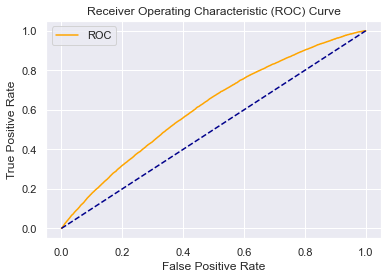

In [46]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(scale_train, features_to_be_removed, model="Logisitic Regression", show_visual=False, roc=True)

Accuracy score is good, however the model is not predicting the Defaults well

#### Conclusion

From the above results it's clear that Decision Tress with binning gives the highest Balanced Accuracy Score 0.5038860107824398

## 5. Performance Improvements

### 1. Dealing with Imbalanced data

As Classification with scaling is much better for both the models decision tree and logistic regression. We use scaled data set to further enhance the accuracy.

### Upsampling

Upsampling can be defined as adding more copies of the minority class. Upsampling can be a good choice when you don’t have a ton of data to work with. (Not a good choice here though)

In [47]:

from sklearn.utils import resample

# separate minority and majority classes
not_fraud = scale_df[scale_df.LOAN_DEFAULT==0]
fraud = scale_df[scale_df.LOAN_DEFAULT==1]

In [48]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.LOAN_DEFAULT.value_counts()


0.0    182543
1.0    182543
Name: LOAN_DEFAULT, dtype: int64

#### Decision Tree after upsampling

Confusion Matrix: [[28623 26328]
 [18101 36474]]
Accuracy of model 0.5943520260029582
Cross Validation Score 0.5935240256691188
Balanced Accuracy Score 0.5946051147737643
F1 Score  0.6214846179404825
Recall Score  0.6683279890059551
AUC: 0.63


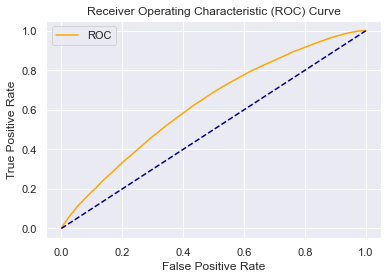

In [49]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(upsampled, features_to_be_removed, model="Decision Tree", show_visual=False, roc=True)

#### Logistic Regression after upsampling

Confusion Matrix [[30160 24791]
 [20496 34079]]
Accuracy of model 0.5865182696346073
Cross Validation Score 0.5856237282829864
Balanced Accuracy Score 0.5866480203122371
F1 Score  0.6008021508219842
Recall Score  0.6244434264773248
AUC: 0.62


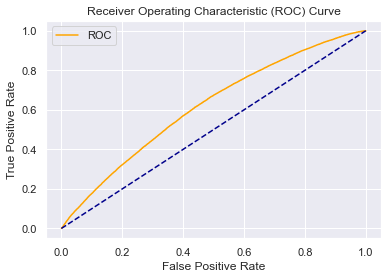

In [50]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(upsampled, features_to_be_removed, model="Logisitic Regression", show_visual=False, roc=True)

### Downsampling

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [51]:
#Downsample
from sklearn.utils import resample

# separate minority and majority classes
not_fraud = scale_df[scale_df.LOAN_DEFAULT==0]
fraud = scale_df[scale_df.LOAN_DEFAULT==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.LOAN_DEFAULT.value_counts()

0.0    50611
1.0    50611
Name: LOAN_DEFAULT, dtype: int64

#### Decision Tree after Downsampling

In [ ]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(downsampled, features_to_be_removed, model="Decision Tree", show_visual=False, roc=True)

Confusion Matrix: [[7874 7243]
 [5536 9714]]


#### Logistic Regression after downsampling

In [347]:
features_to_be_removed = ["total_emi","extra_finance", "DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS", "total_overdue_account", "total_remaining_loan_amount", "e_type_miss", "e_type_salaried", "ASSET_COST"]
predict_accuracy_by_feature_elimination(downsampled, features_to_be_removed, model="Logisitic Regression", show_visual=False, roc=True)

Confusion Matrix [[8503 6614]
 [5966 9284]]
Accuracy of model 0.5857345144400171
Cross Validation Score 0.5852093097186277
Balanced Accuracy Score 0.5856331065774392
F1 Score  0.5961217413638116
Recall Score  0.6087868852459016


As there is not much difference in both the models when used down sampling let's proceed further with downsampled data.